<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# Lab: Titanic EDA

---
For this lab, we're going to take a look at the Titanic manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.

## Step 1: Reading the data

1. Read the titanic data (in the form of the `train.csv` in this repo using the appropriate Pandas method).

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [106]:
train = pd.read_csv("train.csv")

In [107]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [108]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data Dictionary

| Variable | Description | Details |
|----------|-------------|---------|
| survival | Survival | 0 = No; 1 = Yes |
| pclass | Passenger Class | 1 = 1st; 2 = 2nd; 3 = 3rd |
| name | First and Last Name | |
| sex | Sex | |
| age | Age | |
| sibsp | Number of Siblings/Spouses Aboard | |
| parch | Number of Parents/Children Aboard | |
| ticket | Ticket Number | |
| fare | Passenger Fare | |
| cabin | Cabin | |
| embarked | Port of Embarkation | C = Cherbourg; Q = Queenstown; S = Southampton |

## Step 2: Cleaning the data
####  1. Create a bar chart showing how many missing values are in each column

<Axes: >

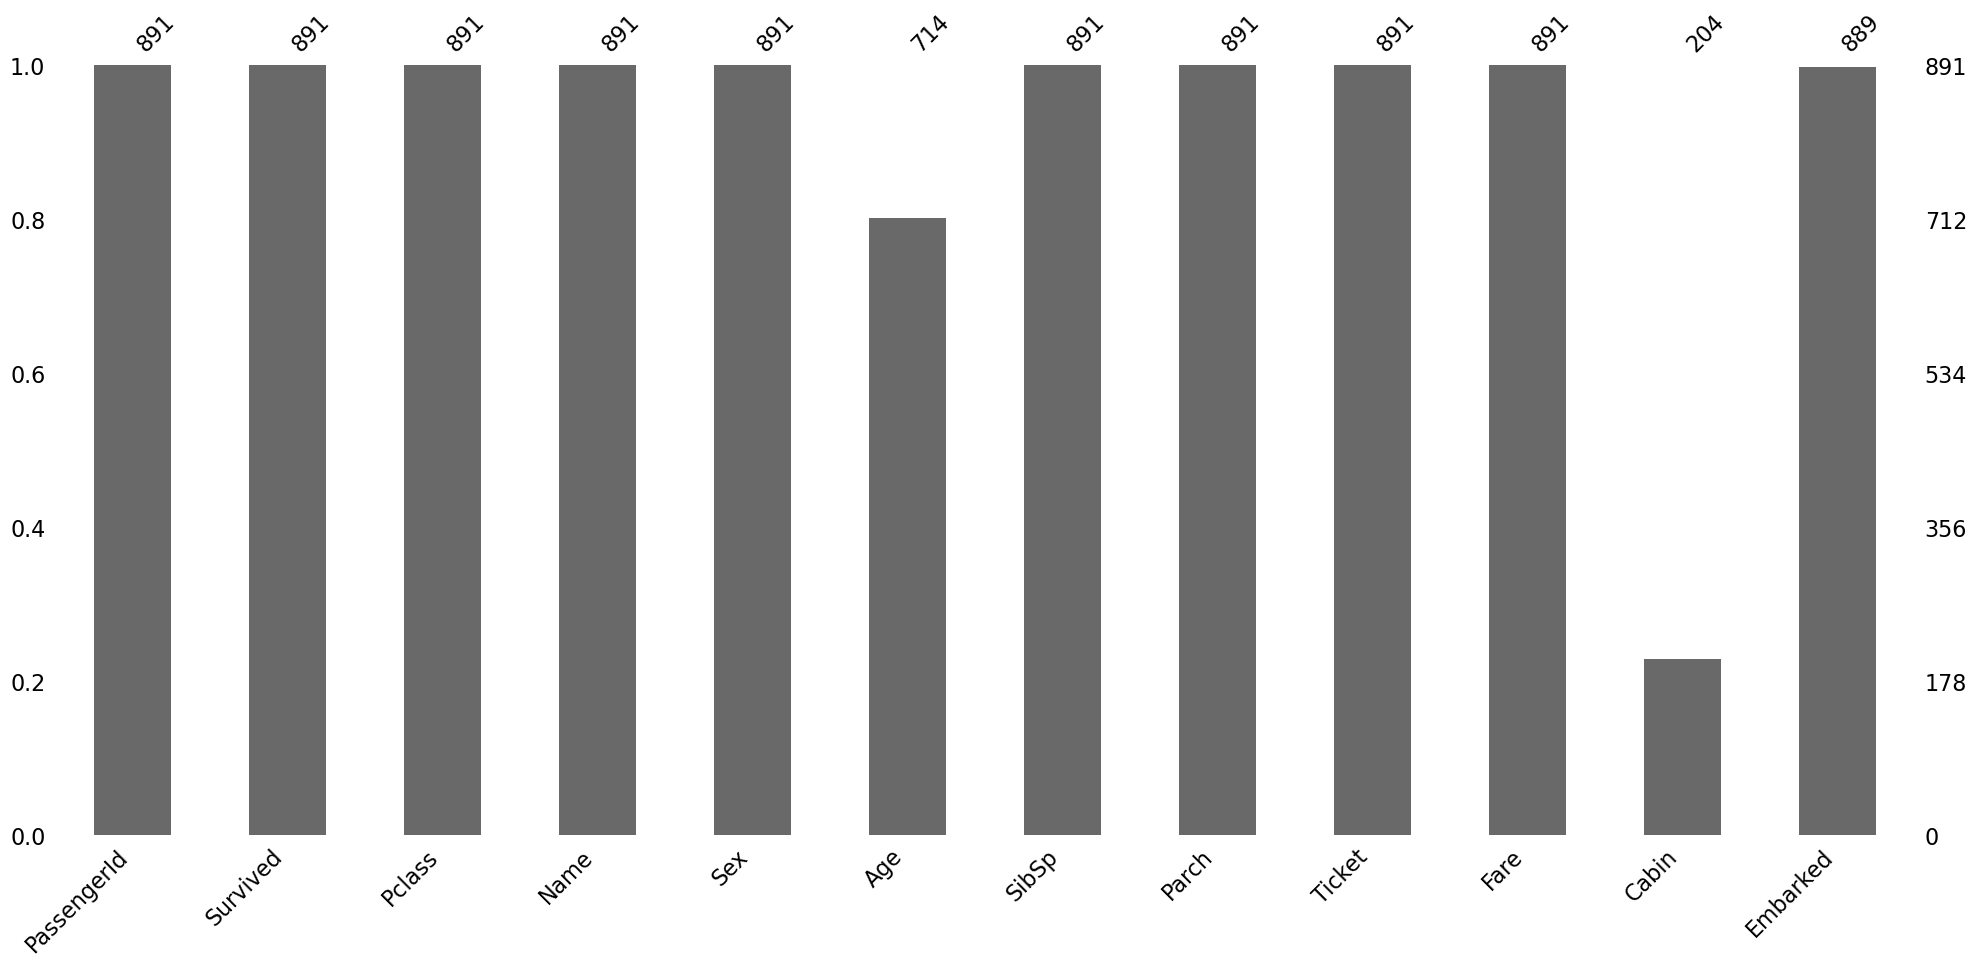

In [111]:
msno.bar(train.sample(891))

####  2. Which column has the most `NaN` values? How many cells in that column are empty?


In [113]:
train.isnull().sum() # The 'Cabin' column has the most NaNs = 687.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

####  3. Delete all rows where `Embarked` is empty

In [115]:
train = train.dropna(subset=['Embarked']).reset_index(drop=True)

In [116]:
train['Embarked'].isnull().sum()

0

#### 4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [118]:
train['Cabin'] = train['Cabin'].fillna("¯\\_(ツ)_/¯")

In [119]:
train['Cabin'].isnull().sum() #check

0

## Step 3: Feature extraction

#### 1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.

In [122]:
train['FamilyCount'] = train['SibSp'] + train['Parch']

In [123]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilyCount  889 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.4+ KB


#### 2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.


In [125]:
#train['Name'].unique()

In [126]:
train['IsReverend'] = train['Name'].apply(lambda x: 1 if 'Rev.' in x else 0)

#### 3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`.

  - Familiarize yourself with the [**`pd.get_dummies` documentation**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS (required): Extract the title from everyone's name and create dummy columns

In [128]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [129]:
# to create dummy variables 
embarked_dummies = pd.get_dummies(train['Embarked'], prefix='Embarked') # I forgot to put dtype=int
# to merge the dummy variables to the original df train.
train = pd.concat([train, embarked_dummies], axis=1) 

In [130]:
train.drop(columns=['Embarked_C', 'Embarked_S', 'Embarked_Q'], inplace=True)

In [131]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0,0


In [132]:
# to create dummy variables 
embarked_dummies = pd.get_dummies(train['Embarked'], prefix='Embarked', dtype=int) # put dtype=int
# to merge the dummy variables to the original df train.
train = pd.concat([train, embarked_dummies], axis=1)

In [133]:
# Extract titles from the Name column
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\\.', expand=False)
 
# Create dummy variables for Sex
sex_dummies = pd.get_dummies(train['Sex'], prefix='Sex', dtype=int)

# Create dummy variables for Title
title_dummies = pd.get_dummies(train['Title'], prefix='Title', dtype=int)

# Merge the dummy variables with the original DataFrame
train = pd.concat([train, sex_dummies, title_dummies], axis=1)

In [134]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilyCount',
       'IsReverend', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title',
       'Sex_female', 'Sex_male', 'Title_Capt', 'Title_Col', 'Title_Countess',
       'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir'],
      dtype='object')

## Step 4: Exploratory analysis

_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

#### 1. What was the survival rate overall?


In [138]:
train.shape

(889, 37)

In [139]:
train['Survived'].value_counts() # (340/889)*100

Survived
0    549
1    340
Name: count, dtype: int64

In [140]:
survival_rate = (340/889.0)*100 # survival rate = 38.2% (percent survived)
print(survival_rate)

38.24521934758155


#### 2. Which gender fared the worst? What was their survival rate?

In [142]:
#train['Sex'].value_counts() #577 males, 312 females in total??
total_survivors = train[train['Survived']==1].shape[0]

In [143]:
#train = train.loc[:,~train.columns.duplicated()]

In [144]:
female_survivors = train[(train['Sex'] == 'female') & (train['Survived'] == 1)].shape[0] #output 231 females survived

In [145]:
male_survivors = train[(train['Sex'] == 'male') & (train['Survived'] == 1)].shape[0] #output 109 males survived

In [146]:
female_survival_rate = (female_survivors/total_survivors)*100 # % females survived out of total survivors

In [147]:
male_survival_rate = (male_survivors/total_survivors)*100 # % males survived out of total survivors

In [148]:
print(f"The males fared the worst. Only {male_survival_rate:.2f}% males survived.")

The males fared the worst. Only 32.06% males survived.


#### 3. What was the survival rate for each `Pclass`?

In [150]:
get_survivors = train[['Survived', 'Pclass']].groupby(['Pclass']).sum()
get_survivors

,Survived
Pclass,
1,134
2,87
3,119


In [151]:
#percent_survivors = (get_survivors / total_survivors) * 100
"""
    1st class= (134/340)*100 = 39.4%, 
    2nd class = (87/340)*100 = 25.6%, 
    3rd class=(119/340)*100 = 35.0% """

'\n    1st class= (134/340)*100 = 39.4%, \n    2nd class = (87/340)*100 = 25.6%, \n    3rd class=(119/340)*100 = 35.0% '

#### 4. Did any reverends survive? How many?`

In [153]:
reverends = train[train['Name'].str.contains('Rev.')]

reverends_survived = reverends[reverends['Survived'] == 1]

# Get the number of reverends who survived
num_reverends_survived = reverends_survived.shape[0]

#### 5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

In [155]:
# Filter rows where 'Cabin' is marked with '¯\_(ツ)_/¯' 
marked_cabins = train[(train['Cabin'] == r"¯\_(ツ)_/¯") & (train['Survived'] ==1)]

# Calculate the survival rate
survival_rate_marked_cabins = marked_cabins.shape[0]/total_survivors*100

In [156]:
marked_cabins.shape[0]

206

In [157]:
print(f"The survival rate for marked cabins is {survival_rate_marked_cabins:.2f}%.")

The survival rate for marked cabins is 60.59%.


In [158]:
# just checking answer please ignore
#train[['Survived', 'Cabin']].value_counts() 
#print("(206/340)*100 = 60.5%")

#### 6. What is the survival rate for people whose `Age` is empty?

In [160]:
nan_age_passengers = train[train['Age'].isna()].shape[0]
survival_rate_nan_age = (nan_age_passengers/total_survivors)*100

####  7. What is the survival rate for each port of embarkation?

C survivors 27.35294117647059%, Q survivors 8.823529411764707%, and S survivors 63.8235294117647%.


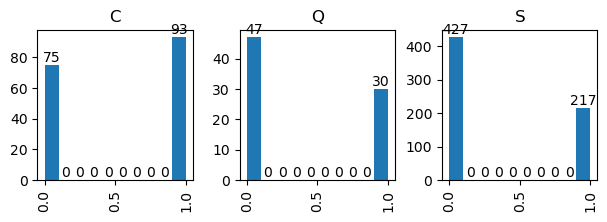

In [162]:
#Histogram
axes = train.hist('Survived', by='Embarked', layout=[1,3], figsize =[7,2])
# Add labels on top of the bars
for ax in axes.flatten():
    for patch in ax.patches:
        ax.annotate(f'{int(patch.get_height())}', 
                    (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                    ha='center', va='bottom');

c_survivors = (93/total_survivors)*100
q_survivors = (30/total_survivors)*100
s_survivors = (217/total_survivors)*100
print(f"C survivors {c_survivors}%, Q survivors {q_survivors}%, and S survivors {s_survivors}%.")

#### 8. What is the survival rate for children (under 12) in each `Pclass`?

In [164]:
train[train['Age'] <12].shape  #total children under 12 = 68 kids.

(68, 37)

In [165]:
train[(train['Age'] <12) & (train['Survived']==1)] # =39 kids

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,...,0,0,1,0,0,0,0,0,0,0
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,...,0,0,1,0,0,0,0,0,0,0
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,...,0,0,1,0,0,0,0,0,0,0
77,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,...,0,1,0,0,0,0,0,0,0,0
164,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,0,2,363291,20.5250,...,0,1,0,0,0,0,0,0,0,0
171,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,...,0,0,1,0,0,0,0,0,0,0
182,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,...,0,1,0,0,0,0,0,0,0,0
183,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.00,0,2,315153,22.0250,...,0,0,1,0,0,0,0,0,0,0
192,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0000,...,0,1,0,0,0,0,0,0,0,0
232,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.00,4,2,347077,31.3875,...,0,0,1,0,0,0,0,0,0,0


In [166]:
train[(train['Age'] <12) & (train['Survived']==1)].groupby('Pclass').size()

Pclass
1     3
2    17
3    19
dtype: int64

In [167]:
"""Answer: firstclass_undertwelve = (3/39)*100 = 7.7%
            secondclass_undertwelve = (17/39)*100 = 43.6%
            thridclass_undertwelve = (19/39)*100 = 48.7%"""

'Answer: firstclass_undertwelve = (3/39)*100 = 7.7%\n            secondclass_undertwelve = (17/39)*100 = 43.6%\n            thridclass_undertwelve = (19/39)*100 = 48.7%'

####  9. Did the captain of the ship survive? Is he on the list?

In [169]:
captain = train[train['Name'].str.contains('Capt.')] #actual captain's name was Edward John Smith
print(f"The captain's name was Crosby, Capt. Edward Gifford and he did not survive.")

The captain's name was Crosby, Capt. Edward Gifford and he did not survive.


#### 10. Of all the people that died, who had the most expensive ticket? How much did it cost?

In [171]:
train[train['Survived'] == 0].describe() #Fare max = 263 USD/Pounds Sterling

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverend,Embarked_C,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
count,549.000000,549.0,549.000000,424.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,...,549.000000,549.000000,549.000000,549.0,549.0,549.000000,549.000000,549.0,549.000000,549.0
mean,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887,0.883424,0.010929,0.136612,...,0.001821,0.030965,0.100182,0.0,0.0,0.794171,0.047359,0.0,0.010929,0.0
std,260.640469,0.0,0.735805,14.172110,1.288399,0.823166,31.388207,1.830669,0.104064,0.343751,...,0.042679,0.173382,0.300517,0.0,0.0,0.404675,0.212599,0.0,0.104064,0.0
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
25%,211.000000,0.0,2.000000,21.000000,0.000000,0.000000,7.854200,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0
50%,455.000000,0.0,3.000000,28.000000,0.000000,0.000000,10.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0
75%,675.000000,0.0,3.000000,39.000000,1.000000,0.000000,26.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000,10.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,0.0,1.000000,0.0


In [172]:
train[(train['Survived'] == 0) & (train['Fare']==263)] # 2 people with the highest fare. Name: Fortune, Mr. Charles Alexander and Fortune, Mr. Mark

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,...,0,0,0,0,0,1,0,0,0,0
437,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,...,0,0,0,0,0,1,0,0,0,0


In [173]:
deaths = train[train['Survived'] == 0] #df filtered just the deaths i.e. survived =0 

In [174]:
deaths['Fare'].max()

263.0

#### 11. Does having family on the boat help or hurt your chances of survival?

In [176]:
train[['FamilyCount', 'Survived']].value_counts() # It appears that by being alone (FamilyCount =0) your chances of dying increases.
#374 people died alone (FamilyCount=0) compared to deaths lower than 72 for 1,2 3, 4, 5, etc. family members.
#However, the number of single people are also the maximum in terms of count for survivors. 
singles_survived = (161/340)*100
print(f"The survival rate for single people is {singles_survived:.2f}%, which is the highest percentage of the survivors.")

The survival rate for single people is 47.35%, which is the highest percentage of the survivors.


## Step 5: Plotting
Using Matplotlib and Seaborn, create multiple charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


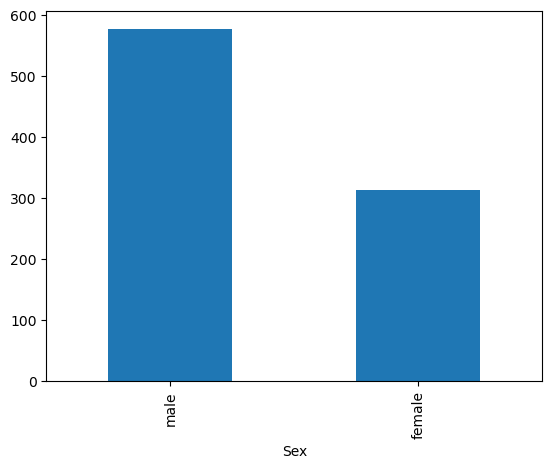

In [178]:
train['Sex'].value_counts().plot(kind='bar');

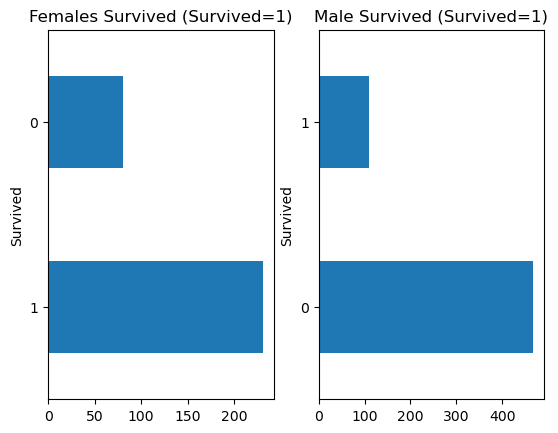

In [179]:
#Survival rate for Males and Females

fig, axs = plt.subplots(1,2)
train[train['Sex'] == 'female'].Survived.value_counts().plot(kind='barh', ax=axs[0], title="Females Survived (Survived=1)")
train[train['Sex'] == 'male'].Survived.value_counts().plot(kind='barh', ax=axs[1], title="Male Survived (Survived=1)");

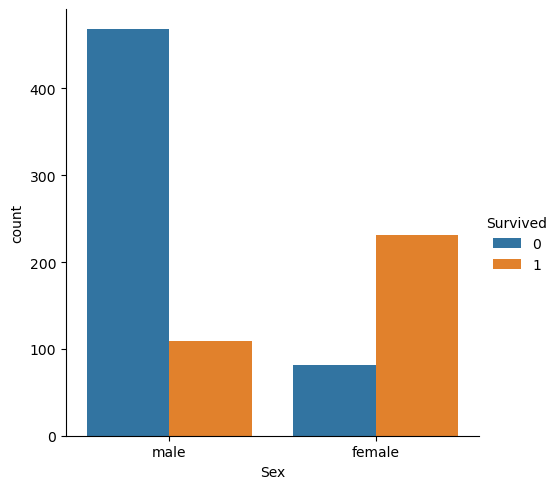

In [180]:
# Countplot for Males and Females survived
sns.catplot(x ="Sex", hue ="Survived",  
kind ="count", data = train);

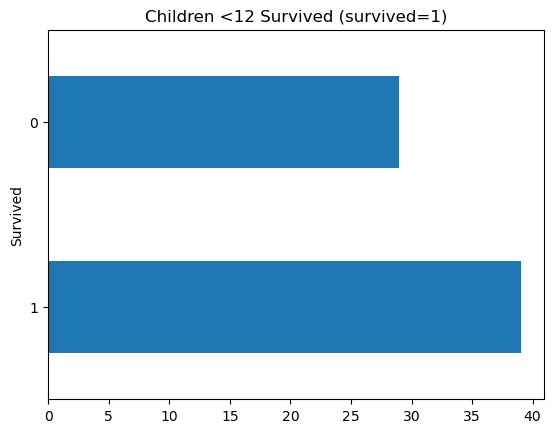

In [181]:
#Survival rate for Children <12 Years Old
train[train['Age'] <12].Survived.value_counts().plot(kind='barh', title="Children <12 Survived (survived=1)");

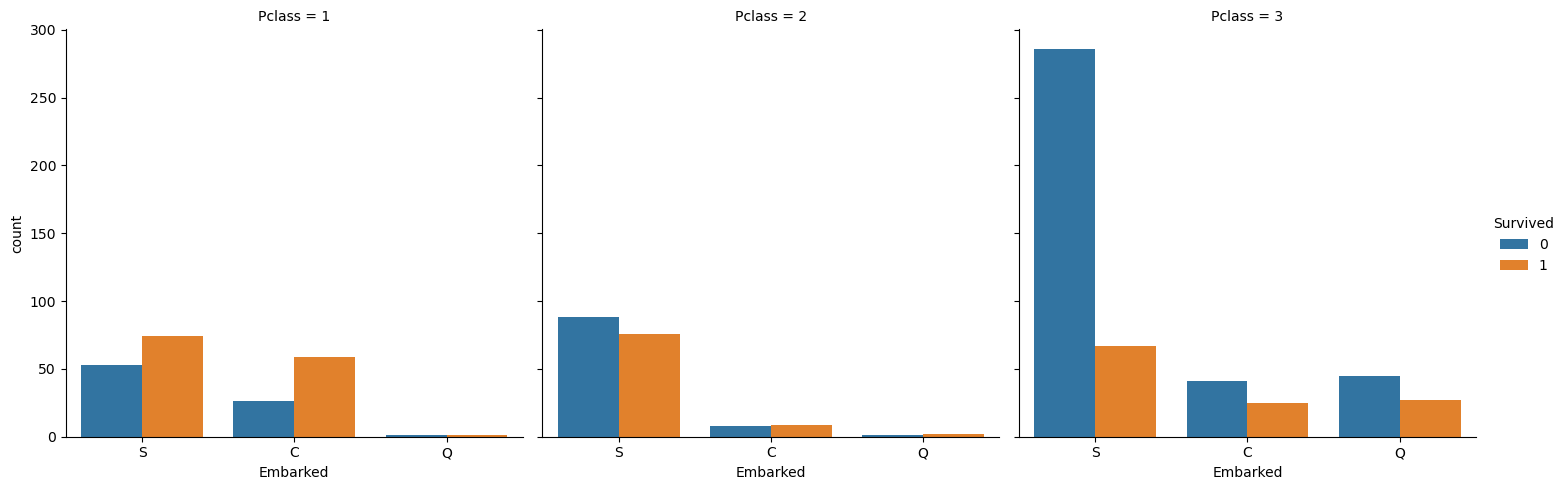

In [182]:
#count plot for embarked place, class and survival rate. Seems like 3rd class had the worst survival, who mostly embarked from S.
 
sns.catplot(x ='Embarked', hue ='Survived',  
kind ='count', col ='Pclass', data = train); 


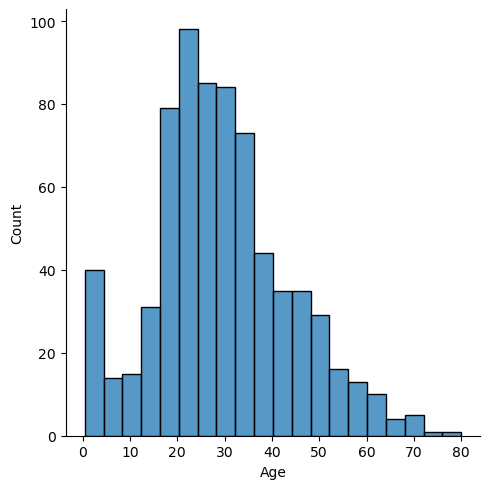

In [183]:
#Distribution of Age
sns.displot(train['Age']);

C:\Users\Nareerat Moottatarn\AppData\Local\Temp\ipykernel_30992\2778450395.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bin_survivor_count = train[train['Survived'] == 1].groupby('AgeBin')['Survived'].count()


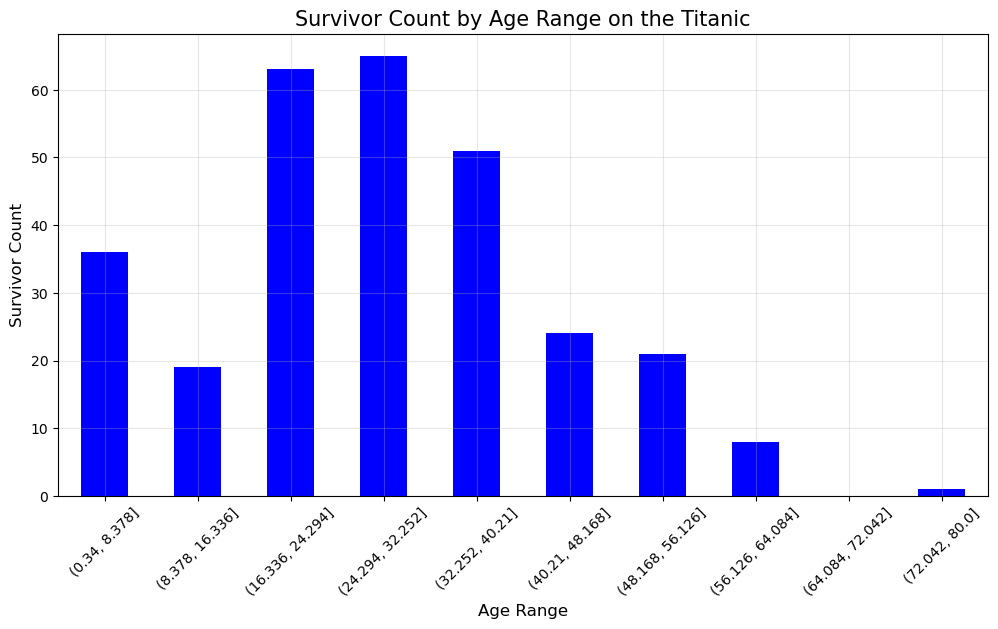

In [184]:
#survival rate for age : Mostly children under 8 and middle aged people survived 20-50s years old.
# Bin the ages into 10 bins
train['AgeBin'] = pd.cut(train['Age'], bins=10)

# Count the number of survivors for each age bin
age_bin_survivor_count = train[train['Survived'] == 1].groupby('AgeBin')['Survived'].count()

# Plot the bar chart
plt.figure(figsize=(12, 6))
age_bin_survivor_count.plot(kind='bar', color='blue')
plt.title('Survivor Count by Age Range on the Titanic', fontsize=15)
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Survivor Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show();

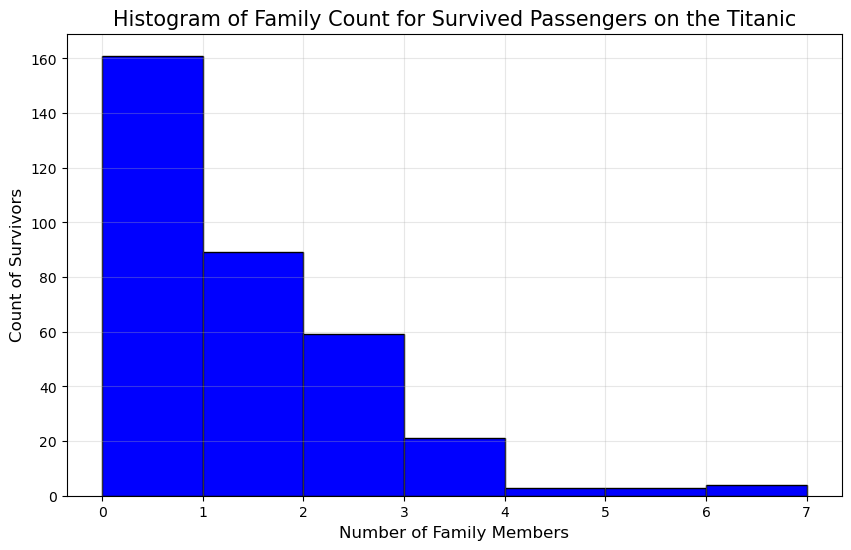

In [185]:
#survival rate for family

# Filter the DataFrame for survivors
survivors_train = train[train['Survived'] == 1]

#  histogram for FamilyCount
plt.figure(figsize=(10, 6))
plt.hist(survivors_train['FamilyCount'], bins=range(survivors_train['FamilyCount'].max() + 2), color='blue', edgecolor='black')
plt.title('Histogram of Family Count for Survived Passengers on the Titanic', fontsize=15)
plt.xlabel('Number of Family Members', fontsize=12)
plt.ylabel('Count of Survivors', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show();

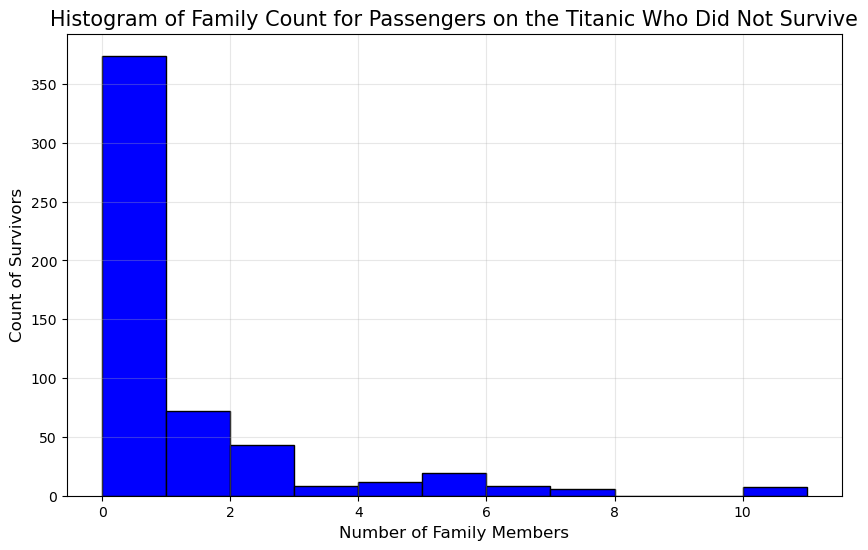

In [186]:
# Filter the DataFrame for survivors
survivors_train = train[train['Survived'] == 0]

#  histogram for FamilyCount
plt.figure(figsize=(10, 6))
plt.hist(survivors_train['FamilyCount'], bins=range(survivors_train['FamilyCount'].max() + 2), color='blue', edgecolor='black')
plt.title('Histogram of Family Count for Passengers on the Titanic Who Did Not Survive', fontsize=15)
plt.xlabel('Number of Family Members', fontsize=12)
plt.ylabel('Count of Survivors', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show();

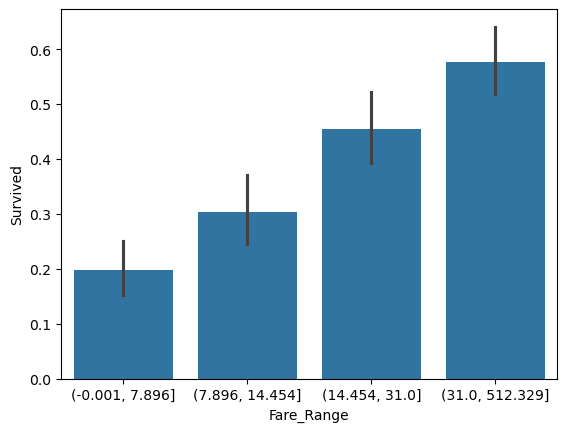

In [187]:
#survival rate for fare : seems like higher fares have higher survival rates.

# Divide Fare into 10 bins 
train['Fare_Range'] = pd.qcut(train['Fare'], 4)
sns.barplot(x ='Fare_Range', y ='Survived',  
data = train);